# Train a Variational Autoencoder for generating cat images

In [1]:
import numpy as np
from glob import glob
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from src.model import genModel
from src.vaeHelpers import *

%matplotlib inline

Using TensorFlow backend.


## Load the data

Load the data, create a training/validation split. Save the split to a file to help with continuation of training.

In [2]:
trainFresh = True

if ( trainFresh ):
    catFiles = np.array( glob('./catCropedBetter/*.jpg') )
    
    valFrac = 0.1
    n = len(catFiles)
    
    inds = np.random.permutation( len(catFiles) )
    trainInds, valInds = inds[ : -int(n*valFrac) ], inds[ -int(n*valFrac) : ]
    
    train, val = catFiles[ trainInds ], catFiles[ valInds ]
    
    writeFilesList( "trainCats.txt", train )
    writeFilesList( "valCats.txt", val )

else:
    val   = readSavedFiles( "valFiles.txt" )
    train = readSavedFiles( "trainFiles.txt" )

## Generate the model 

In [3]:
batchSize = 64
imgSize = 128

encoder, decoder, VAE = genModel( imgSize = 128, lossType = "mse" )
VAE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
encoder (Model)              [(None, 2048), (None, 204 16814392  
_________________________________________________________________
decoder (Model)              (None, 128, 128, 3)       12632191  
Total params: 29,446,583
Trainable params: 29,429,841
Non-trainable params: 16,742
_________________________________________________________________


/home/baxter/Desktop/MLbook/catGenerator/src/model.py:96: UserWarning: Output "decoder" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder" during training.
  VAE.compile( optimizer = opt, loss = None )


## Train the model

In [4]:
if ( not trainFresh ):
    VAE.load_weights( "weights/catGen.hdf5" )

earlyStopper = EarlyStopping( patience = 50, verbose = 1 )
checkPointer = ModelCheckpoint( filepath = "weights/catGen.hdf5", save_best_only = True, verbose = 1 )
rateReduce   = ReduceLROnPlateau( monitor = 'val_loss', factor = 0.5, patience = 20, cooldown = 5 )

losses = VAE.fit_generator( genBatch( train, batchSize, imgSize, True ),
                   validation_data = genBatch( val, batchSize, imgSize, False ),
                   epochs = 5000,
                   validation_steps = len(val)   // batchSize,
                   steps_per_epoch  = len(train) // batchSize,
                   callbacks = [ earlyStopper, checkPointer ] )
                   #callbacks = [ earlyStopper, checkPointer, rateReduce ] )

Epoch 1/5000
139/140 [============================>.] - ETA: 0s - loss: 3266.7084
Epoch 00001: val_loss improved from inf to 1881.48892, saving model to weights/catGen.hdf5
140/140 [==============================] - 23s 166ms/step - loss: 3266.2811 - val_loss: 1881.4889
Epoch 2/5000
139/140 [============================>.] - ETA: 0s - loss: 1909.6552
Epoch 00002: val_loss improved from 1881.48892 to 1017.62392, saving model to weights/catGen.hdf5
140/140 [==============================] - 20s 144ms/step - loss: 1904.7376 - val_loss: 1017.6239
Epoch 3/5000
139/140 [============================>.] - ETA: 0s - loss: 1599.9708
Epoch 00003: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 1596.4964 - val_loss: 7976.7281
Epoch 4/5000
139/140 [============================>.] - ETA: 0s - loss: 1206.9495
Epoch 00004: val_loss improved from 1017.62392 to 766.22519, saving model to weights/catGen.hdf5
140/140 [==============================] - 21s 147ms/s

Epoch 36/5000
139/140 [============================>.] - ETA: 0s - loss: 633.6420
Epoch 00036: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 632.7746 - val_loss: 428.0499
Epoch 37/5000
139/140 [============================>.] - ETA: 0s - loss: 660.4444
Epoch 00037: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 659.4640 - val_loss: 425.2462
Epoch 38/5000
139/140 [============================>.] - ETA: 0s - loss: 679.8299
Epoch 00038: val_loss improved from 408.53303 to 396.14516, saving model to weights/catGen.hdf5
140/140 [==============================] - 20s 144ms/step - loss: 678.2919 - val_loss: 396.1452
Epoch 39/5000
139/140 [============================>.] - ETA: 0s - loss: 642.0622
Epoch 00039: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 640.6343 - val_loss: 423.7830
Epoch 40/5000
139/140 [============================>.] - ETA: 0s - loss: 646.7

139/140 [============================>.] - ETA: 0s - loss: 589.4853
Epoch 00072: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 588.1622 - val_loss: 379.5619
Epoch 73/5000
139/140 [============================>.] - ETA: 0s - loss: 572.4446
Epoch 00073: val_loss did not improve
140/140 [==============================] - 20s 140ms/step - loss: 572.8859 - val_loss: 376.8129
Epoch 74/5000
139/140 [============================>.] - ETA: 0s - loss: 564.1704
Epoch 00074: val_loss did not improve
140/140 [==============================] - 18s 132ms/step - loss: 562.9517 - val_loss: 384.4874
Epoch 75/5000
139/140 [============================>.] - ETA: 0s - loss: 574.1214
Epoch 00075: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 573.0138 - val_loss: 377.3790
Epoch 76/5000
139/140 [============================>.] - ETA: 0s - loss: 579.7776
Epoch 00076: val_loss did not improve
140/140 [=====================

Epoch 109/5000
139/140 [============================>.] - ETA: 0s - loss: 574.3602
Epoch 00109: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 578.3417 - val_loss: 369.9671
Epoch 110/5000
139/140 [============================>.] - ETA: 0s - loss: 540.7134
Epoch 00110: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 545.0088 - val_loss: 357.2255
Epoch 111/5000
139/140 [============================>.] - ETA: 0s - loss: 602.7018
Epoch 00111: val_loss did not improve
140/140 [==============================] - 20s 141ms/step - loss: 601.0890 - val_loss: 357.8241
Epoch 112/5000
139/140 [============================>.] - ETA: 0s - loss: 604.1956
Epoch 00112: val_loss did not improve
140/140 [==============================] - 19s 137ms/step - loss: 602.5643 - val_loss: 358.2113
Epoch 113/5000
139/140 [============================>.] - ETA: 0s - loss: 604.3162
Epoch 00113: val_loss did not improve
140/140 [==

139/140 [============================>.] - ETA: 0s - loss: 575.8957
Epoch 00146: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 574.1788 - val_loss: 350.8902
Epoch 147/5000
139/140 [============================>.] - ETA: 0s - loss: 586.7342
Epoch 00147: val_loss did not improve
140/140 [==============================] - 20s 140ms/step - loss: 584.9522 - val_loss: 353.4242
Epoch 148/5000
139/140 [============================>.] - ETA: 0s - loss: 582.2041
Epoch 00148: val_loss did not improve
140/140 [==============================] - 19s 134ms/step - loss: 580.9110 - val_loss: 377.4475
Epoch 149/5000
139/140 [============================>.] - ETA: 0s - loss: 565.8707
Epoch 00149: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 564.4796 - val_loss: 348.2888
Epoch 150/5000
139/140 [============================>.] - ETA: 0s - loss: 524.8239
Epoch 00150: val_loss improved from 346.72613 to 341.89068, savi

139/140 [============================>.] - ETA: 0s - loss: 548.1238
Epoch 00182: val_loss did not improve
140/140 [==============================] - 20s 143ms/step - loss: 548.1500 - val_loss: 354.0021
Epoch 183/5000
139/140 [============================>.] - ETA: 0s - loss: 551.3951
Epoch 00183: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 549.8591 - val_loss: 342.2077
Epoch 184/5000
139/140 [============================>.] - ETA: 0s - loss: 563.0100
Epoch 00184: val_loss did not improve
140/140 [==============================] - 20s 141ms/step - loss: 568.0982 - val_loss: 348.5426
Epoch 185/5000
139/140 [============================>.] - ETA: 0s - loss: 543.2178
Epoch 00185: val_loss did not improve
140/140 [==============================] - 20s 145ms/step - loss: 541.6308 - val_loss: 342.5720
Epoch 186/5000
139/140 [============================>.] - ETA: 0s - loss: 518.6975
Epoch 00186: val_loss did not improve
140/140 [=================

Epoch 219/5000
139/140 [============================>.] - ETA: 0s - loss: 525.5641
Epoch 00219: val_loss did not improve
140/140 [==============================] - 19s 136ms/step - loss: 524.2865 - val_loss: 352.8435
Epoch 220/5000
139/140 [============================>.] - ETA: 0s - loss: 562.2508
Epoch 00220: val_loss did not improve
140/140 [==============================] - 19s 137ms/step - loss: 560.6383 - val_loss: 338.5302
Epoch 221/5000
139/140 [============================>.] - ETA: 0s - loss: 522.5713
Epoch 00221: val_loss improved from 330.06149 to 327.89793, saving model to weights/catGen.hdf5
140/140 [==============================] - 20s 143ms/step - loss: 525.5181 - val_loss: 327.8979
Epoch 222/5000
139/140 [============================>.] - ETA: 0s - loss: 544.6601
Epoch 00222: val_loss did not improve
140/140 [==============================] - 18s 131ms/step - loss: 543.4494 - val_loss: 335.8280
Epoch 223/5000
139/140 [============================>.] - ETA: 0s - loss: 

Epoch 256/5000
139/140 [============================>.] - ETA: 0s - loss: 472.3851
Epoch 00256: val_loss improved from 322.88490 to 321.25232, saving model to weights/catGen.hdf5
140/140 [==============================] - 20s 144ms/step - loss: 471.0809 - val_loss: 321.2523
Epoch 257/5000
139/140 [============================>.] - ETA: 0s - loss: 554.3666
Epoch 00257: val_loss did not improve
140/140 [==============================] - 20s 140ms/step - loss: 552.7628 - val_loss: 323.9467
Epoch 258/5000
139/140 [============================>.] - ETA: 0s - loss: 539.6971
Epoch 00258: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 539.7487 - val_loss: 326.2043
Epoch 259/5000
139/140 [============================>.] - ETA: 0s - loss: 520.8936
Epoch 00259: val_loss did not improve
140/140 [==============================] - 20s 139ms/step - loss: 520.8067 - val_loss: 326.4853
Epoch 260/5000
139/140 [============================>.] - ETA: 0s - loss: 

Epoch 293/5000
139/140 [============================>.] - ETA: 0s - loss: 510.7407
Epoch 00293: val_loss did not improve
140/140 [==============================] - 20s 142ms/step - loss: 514.5843 - val_loss: 328.2489
Epoch 294/5000
139/140 [============================>.] - ETA: 0s - loss: 499.0690
Epoch 00294: val_loss did not improve
140/140 [==============================] - 19s 135ms/step - loss: 502.2866 - val_loss: 328.3880
Epoch 295/5000
139/140 [============================>.] - ETA: 0s - loss: 535.8858
Epoch 00295: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 535.9470 - val_loss: 325.5408
Epoch 296/5000
139/140 [============================>.] - ETA: 0s - loss: 561.1371
Epoch 00296: val_loss did not improve
140/140 [==============================] - 20s 144ms/step - loss: 559.4958 - val_loss: 328.8693
Epoch 297/5000
139/140 [============================>.] - ETA: 0s - loss: 529.6653
Epoch 00297: val_loss did not improve
140/140 [==

Epoch 331/5000
139/140 [============================>.] - ETA: 0s - loss: 527.5225
Epoch 00331: val_loss did not improve
140/140 [==============================] - 20s 143ms/step - loss: 525.9245 - val_loss: 319.9382
Epoch 332/5000
139/140 [============================>.] - ETA: 0s - loss: 509.5354
Epoch 00332: val_loss did not improve
140/140 [==============================] - 20s 141ms/step - loss: 509.2631 - val_loss: 319.3438
Epoch 333/5000
139/140 [============================>.] - ETA: 0s - loss: 582.5602
Epoch 00333: val_loss did not improve
140/140 [==============================] - 19s 137ms/step - loss: 580.6001 - val_loss: 322.6312
Epoch 334/5000
139/140 [============================>.] - ETA: 0s - loss: 535.7279
Epoch 00334: val_loss improved from 312.87535 to 310.79357, saving model to weights/catGen.hdf5
140/140 [==============================] - 20s 146ms/step - loss: 534.0094 - val_loss: 310.7936
Epoch 335/5000
139/140 [============================>.] - ETA: 0s - loss: 

Epoch 368/5000
139/140 [============================>.] - ETA: 0s - loss: 486.1566
Epoch 00368: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 484.9222 - val_loss: 319.8647
Epoch 369/5000
139/140 [============================>.] - ETA: 0s - loss: 497.4895
Epoch 00369: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 497.6691 - val_loss: 355.5073
Epoch 370/5000
139/140 [============================>.] - ETA: 0s - loss: 497.2555
Epoch 00370: val_loss did not improve
140/140 [==============================] - 20s 141ms/step - loss: 498.2540 - val_loss: 312.4695
Epoch 371/5000
139/140 [============================>.] - ETA: 0s - loss: 511.4736
Epoch 00371: val_loss did not improve
140/140 [==============================] - 19s 139ms/step - loss: 510.3159 - val_loss: 321.4042
Epoch 372/5000
139/140 [============================>.] - ETA: 0s - loss: 524.3919
Epoch 00372: val_loss did not improve
140/140 [==

Epoch 406/5000
139/140 [============================>.] - ETA: 0s - loss: 589.0140
Epoch 00406: val_loss did not improve
140/140 [==============================] - 19s 138ms/step - loss: 587.0364 - val_loss: 321.7775
Epoch 407/5000
139/140 [============================>.] - ETA: 0s - loss: 494.9768
Epoch 00407: val_loss did not improve
140/140 [==============================] - 19s 134ms/step - loss: 493.7542 - val_loss: 312.5618
Epoch 408/5000
139/140 [============================>.] - ETA: 0s - loss: 520.5290
Epoch 00408: val_loss did not improve
140/140 [==============================] - 20s 141ms/step - loss: 519.0777 - val_loss: 314.9727
Epoch 409/5000
139/140 [============================>.] - ETA: 0s - loss: 570.1756
Epoch 00409: val_loss did not improve
140/140 [==============================] - 20s 144ms/step - loss: 568.4228 - val_loss: 316.0596
Epoch 410/5000
139/140 [============================>.] - ETA: 0s - loss: 501.9301
Epoch 00410: val_loss did not improve
140/140 [==

## Plot a learning curve

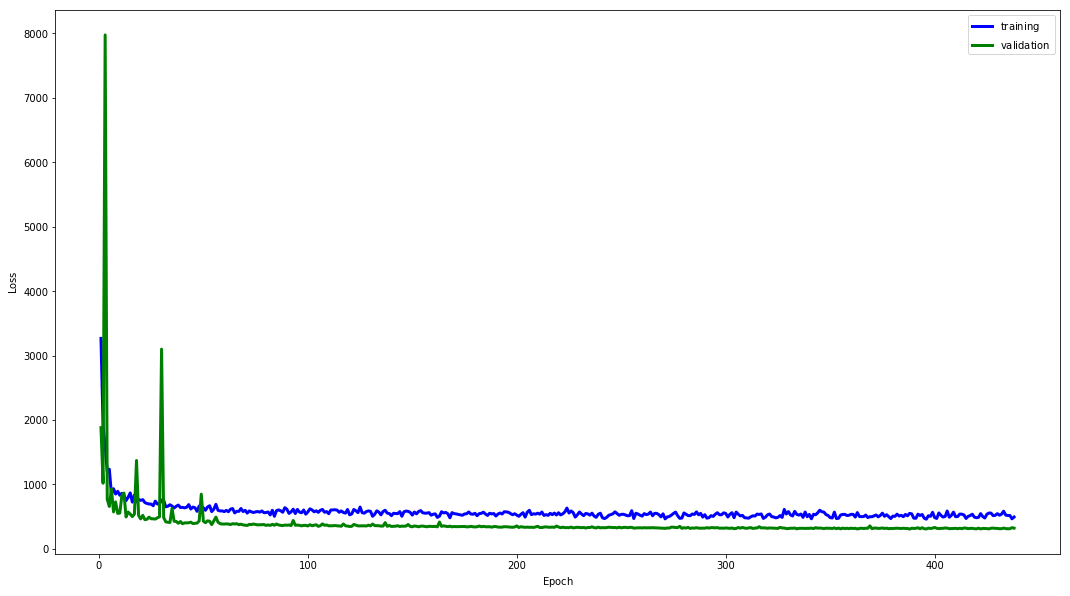

In [5]:
plotLosses( losses.history )